In [133]:
#importing library
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity


In [134]:
#Load the data 
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

C:\Users\svijayaraghavan\AppData\Local\Temp\ipykernel_22084\3238617989.py:3: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,

In [135]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [136]:
C= movies['vote_average'].mean()
C

6.092171559442016

In [137]:
m= movies['vote_count'].quantile(0.9)
m

1838.4000000000015

In [138]:
# Filter based on popularity
movies = movies[movies['vote_average'] >= 8]

## Data Visualizations

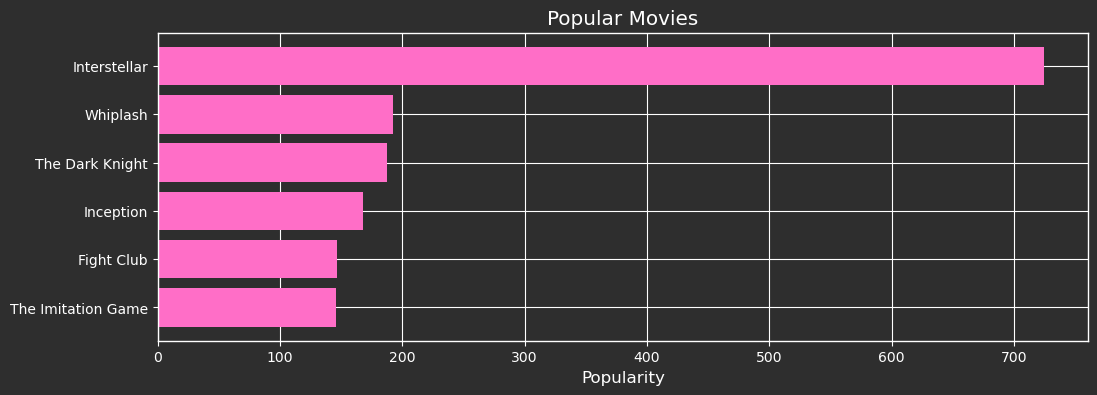

In [139]:
import matplotlib.pyplot as plt

# Use ggplot style
plt.style.use('ggplot')

# Assuming 'movies' DataFrame is already defined and has 'title' and 'popularity' columns
pop = movies.sort_values('popularity', ascending=False)

# Create a figure with specified size
fig, ax = plt.subplots(figsize=(12, 4))

# Plot horizontal bar chart with neon pink color
ax.barh(pop['title'].head(6), pop['popularity'].head(6), align='center', color='#FF6EC7')  # Neon pink color code

# Invert y-axis to have the most popular movie at the top
ax.invert_yaxis()

# Set the background color to dark
ax.set_facecolor('#2E2E2E')  # Dark background color
fig.patch.set_facecolor('#2E2E2E')

# Set the labels and title with white color for better visibility
ax.set_xlabel("Popularity", color='white')
ax.set_title("Popular Movies", color='white')

# Change the color of the ticks and tick labels to white
ax.tick_params(colors='white', which='both')  # both major and minor ticks are affected
plt.yticks(color='white')
plt.xticks(color='white')

# Show the plot
plt.show()


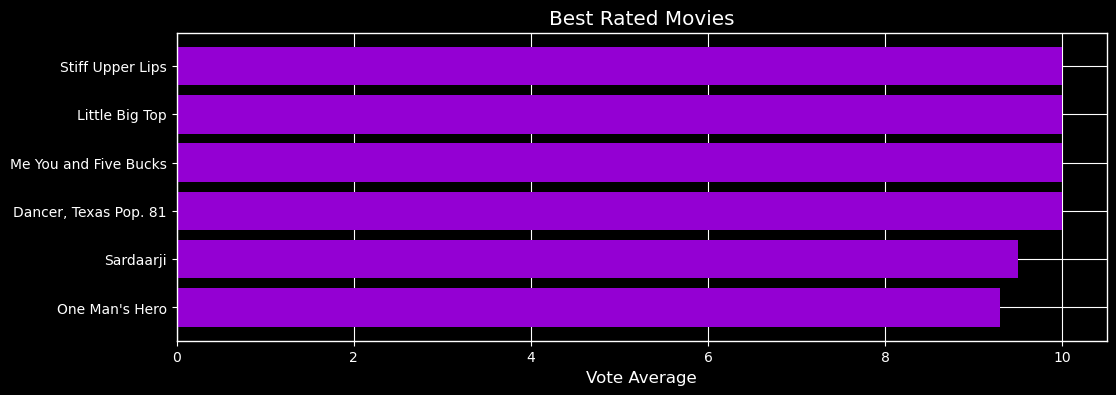

In [140]:
import matplotlib.pyplot as plt

# Assuming 'movies' DataFrame is already defined and has 'title' and 'vote_average' columns
best_rated = movies.sort_values('vote_average', ascending=False)

# Create a figure with specified size
fig, ax = plt.subplots(figsize=(12, 4))

# Plot horizontal bar chart with neon purple color
ax.barh(best_rated['title'].head(6), best_rated['vote_average'].head(6), align='center', color='#9400D3')  # Neon purple color code

# Invert y-axis to have the best-rated movie at the top
ax.invert_yaxis()

# Set the background color to black
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Set the labels and title with white color for better visibility
ax.set_xlabel("Vote Average", color='white')
ax.set_title("Best Rated Movies", color='white')

# Change the color of the ticks and tick labels to white
ax.tick_params(colors='white', which='both')  # both major and minor ticks are affected
plt.yticks(color='white')
plt.xticks(color='white')

# Show the plot
plt.show()



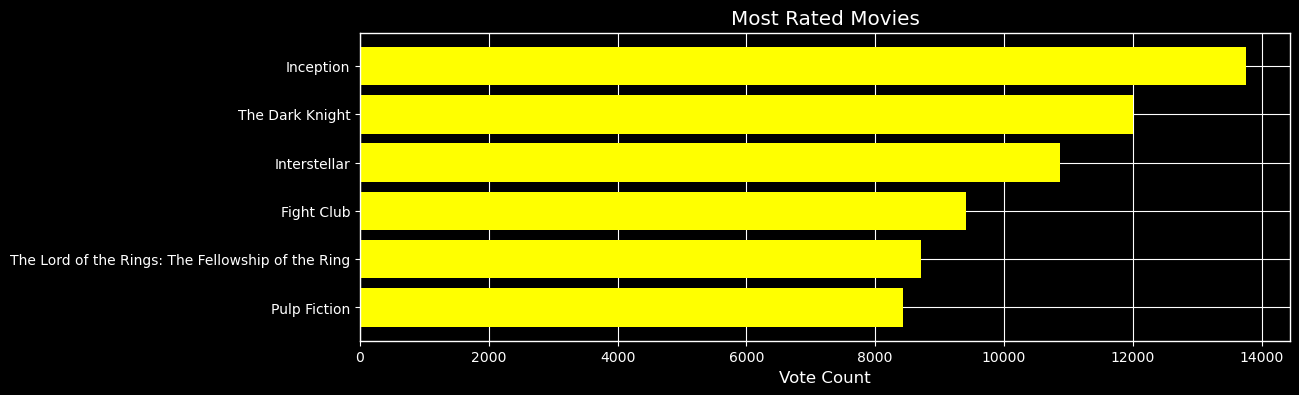

In [141]:
import matplotlib.pyplot as plt

# Assuming 'movies' DataFrame is already defined and has 'title' and 'vote_count' columns
most_voted = movies.sort_values('vote_count', ascending=False)

# Create a figure with specified size
fig, ax = plt.subplots(figsize=(12, 4))

# Plot horizontal bar chart with neon yellow color
ax.barh(most_voted['title'].head(6), most_voted['vote_count'].head(6), align='center', color='#FFFF00')  # Neon yellow color code

# Invert y-axis to have the most voted movie at the top
ax.invert_yaxis()

# Set the background color to black
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Set the labels and title with white color for better visibility
ax.set_xlabel("Vote Count", color='white')
ax.set_title("Most Rated Movies", color='white')

# Change the color of the ticks and tick labels to white
ax.tick_params(colors='white', which='both')  # both major and minor ticks are affected
plt.yticks(color='white')
plt.xticks(color='white')

# Show the plot
plt.show()



In [142]:
# Create year column
movies['year'] = movies['release_date'].str[-4:]
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,7/16/2008,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,2008
77,175000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",http://movies.disney.com/inside-out,150540,"[{""id"": 1566, ""name"": ""dream""}, {""id"": 6513, ""...",en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",128.655964,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,6/9/2015,857611174,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Meet the little voices inside your head.,Inside Out,8.0,6560,2015
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,11/5/2014,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,2014
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,7/14/2010,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,2010
262,93000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.lordoftherings.net/,120,"[{""id"": 603, ""name"": ""elves""}, {""id"": 604, ""na...",en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",138.049577,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...",...,12/18/2001,871368364,178.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,8.0,8705,2001


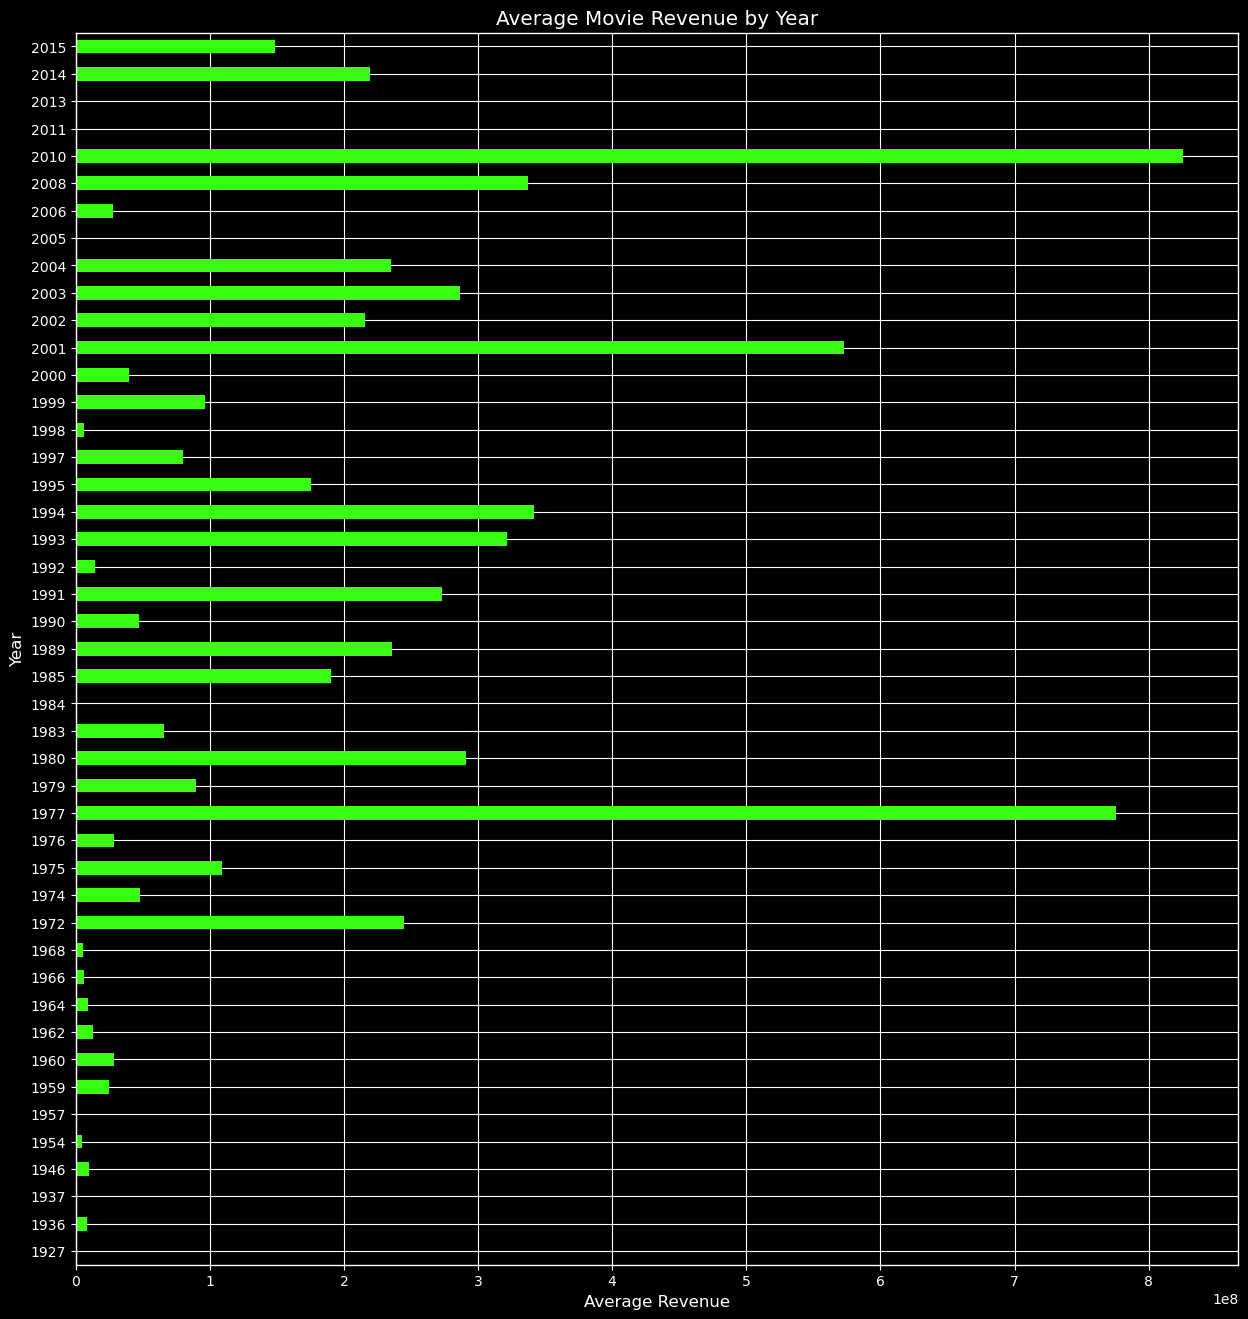

In [143]:
import matplotlib.pyplot as plt

# Assuming 'movies' DataFrame is already defined and has 'year' and 'revenue' columns
fig, ax = plt.subplots(figsize=(15, 16))

# Plot horizontal bar chart with neon green color
movies.groupby('year')['revenue'].mean().plot(kind='barh', ax=ax, color='#39FF14')  # Neon green color code

# Set the background color to black
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Set the title and labels with white color for better visibility
plt.title('Average Movie Revenue by Year', color='white')
plt.xlabel('Average Revenue', color='white')
plt.ylabel('Year', color='white')

# Change the color of the ticks and tick labels to white
ax.tick_params(colors='white', which='both')  # both major and minor ticks are affected
plt.yticks(color='white')
plt.xticks(color='white')

# Show the plot
plt.show()


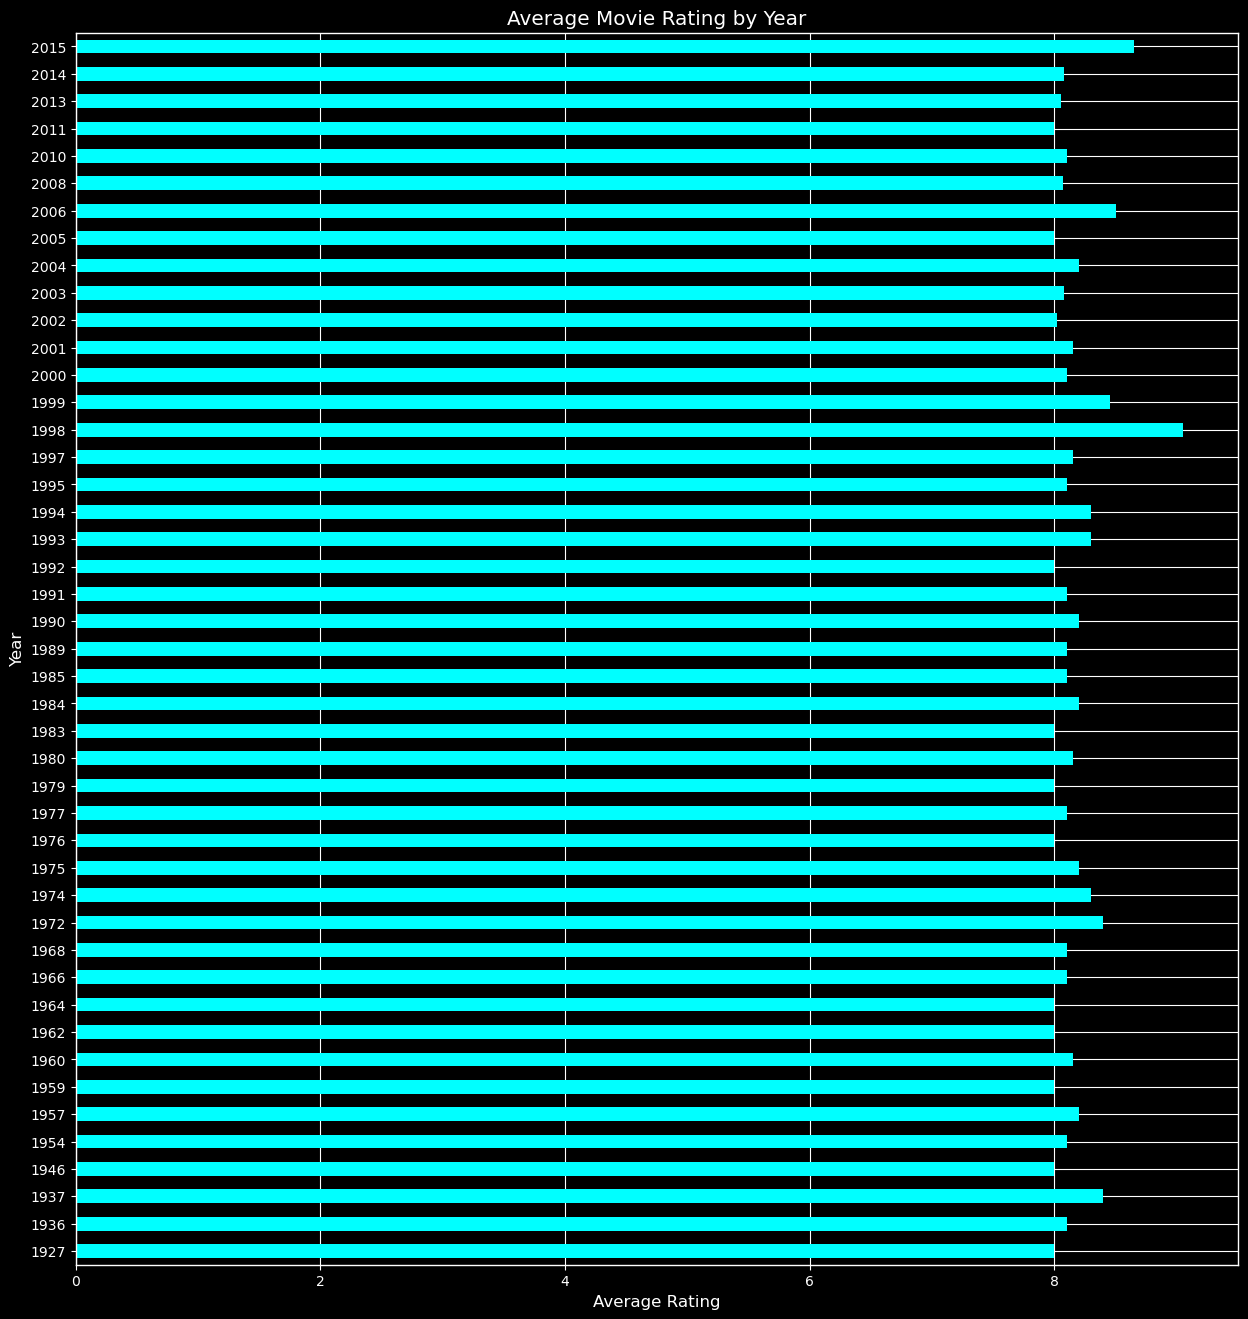

In [144]:
import matplotlib.pyplot as plt

# Assuming 'movies' DataFrame is already defined and has 'year' and 'vote_average' columns
# Group by year and calculate the mean vote average
avg_rating_by_year = movies.groupby('year')['vote_average'].mean()

# Create a figure with specified size
fig, ax = plt.subplots(figsize=(15, 16))

# Plot horizontal bar chart with neon blue color
avg_rating_by_year.plot(kind='barh', color='#00FFFF', ax=ax)  # Neon blue color code

# Set the background color to black
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Set the labels and title with white color for better visibility
ax.set_xlabel('Average Rating', color='white')
ax.set_ylabel('Year', color='white')
ax.set_title('Average Movie Rating by Year', color='white')

# Change the color of the ticks and tick labels to white
ax.tick_params(colors='white', which='both')  # both major and minor ticks are affected
plt.yticks(color='white')
plt.xticks(color='white')

# Show the plot
plt.show()


In [145]:
def weighted_rating(x, movies=movies, credits=credits):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [146]:
credits.head()

,movie_id,title,cast,crew,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
#check the shape of the two dataset 
print("movies dataset shape: ",movies.shape)
print("credits dataset shape: ",credits.shape)

movies dataset shape:  (85, 21)
credits dataset shape:  (4813, 1265)


In [148]:
# merge the two dataset into one dataset
movies=movies.merge(credits,on="title")
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
# removing the unwanted columns 
movies=movies[["movie_id","title","overview","genres","keywords","cast","crew"]]

In [150]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de..."
1,150540,Inside Out,"Growing up can be a bumpy road, and it's no ex...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...","[{""id"": 1566, ""name"": ""dream""}, {""id"": 6513, ""...","[{""cast_id"": 4, ""character"": ""Joy (voice)"", ""c...","[{""credit_id"": ""56098866c3a368681000003a"", ""de..."
2,157336,Interstellar,Interstellar chronicles the adventures of a gr...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...","[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
3,27205,Inception,"Cobb, a skilled thief who commits corporate es...","[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...","[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...","[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de..."
4,120,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 603, ""name"": ""elves""}, {""id"": 604, ""na...","[{""cast_id"": 28, ""character"": ""Frodo Baggins"",...","[{""credit_id"": ""52fe421ac3a36847f80043fb"", ""de..."


In [151]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  85 non-null     object
 1   title     85 non-null     object
 2   overview  85 non-null     object
 3   genres    85 non-null     object
 4   keywords  85 non-null     object
 5   cast      85 non-null     object
 6   crew      85 non-null     object
dtypes: object(7)
memory usage: 4.8+ KB


In [152]:
#chacking the missing data
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [153]:
#removing the missing data
movies.dropna(inplace=True)

# Preprocessing and formating some columns


In [154]:
#genres col 
movies.iloc[0].genres

'[{"id": 18, "name": "Drama"}, {"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 53, "name": "Thriller"}]'

this format is seems to be wrong ,we can fixed it -----we convert the '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]' format into the ["Action","Adventure","Fantasy","Science Fiction"] format....



In [155]:
def convert(obj):
    l=[]
    for i in ast.literal_eval(obj):
        l.append(i["name"])
    return l     

In [156]:
movies["genres"]=movies["genres"].apply(convert)

In [157]:
movies["genres"].head()

0                     [Drama, Action, Crime, Thriller]
1                   [Drama, Comedy, Animation, Family]
2                  [Adventure, Drama, Science Fiction]
3    [Action, Thriller, Science Fiction, Mystery, A...
4                         [Adventure, Fantasy, Action]
Name: genres, dtype: object

In [158]:
#keyword columns 
movies["keywords"].head()

0    [{"id": 849, "name": "dc comics"}, {"id": 853,...
1    [{"id": 1566, "name": "dream"}, {"id": 6513, "...
2    [{"id": 83, "name": "saving the world"}, {"id"...
3    [{"id": 1014, "name": "loss of lover"}, {"id":...
4    [{"id": 603, "name": "elves"}, {"id": 604, "na...
Name: keywords, dtype: object

In [159]:
#convert into correct format
movies["keywords"]=movies["keywords"].apply(convert)
movies["keywords"].head()

0    [dc comics, crime fighter, secret identity, sc...
1    [dream, cartoon, imaginary friend, animation, ...
2    [saving the world, artificial intelligence, fa...
3    [loss of lover, dream, kidnapping, sleep, subc...
4    [elves, dwarves, orcs, middle-earth (tolkien),...
Name: keywords, dtype: object

In [160]:
#cast columns 
movies["cast"][0]

'[{"cast_id": 35, "character": "Bruce Wayne", "credit_id": "52fe4220c3a36847f8005d17", "gender": 2, "id": 3894, "name": "Christian Bale", "order": 0}, {"cast_id": 3, "character": "Joker", "credit_id": "52fe421fc3a36847f8005cbf", "gender": 2, "id": 1810, "name": "Heath Ledger", "order": 1}, {"cast_id": 15, "character": "Harvey Dent", "credit_id": "52fe4220c3a36847f8005cf1", "gender": 2, "id": 6383, "name": "Aaron Eckhart", "order": 2}, {"cast_id": 17, "character": "Alfred", "credit_id": "52fe4220c3a36847f8005cf9", "gender": 2, "id": 3895, "name": "Michael Caine", "order": 3}, {"cast_id": 8, "character": "Rachel", "credit_id": "52fe421fc3a36847f8005cd5", "gender": 1, "id": 1579, "name": "Maggie Gyllenhaal", "order": 4}, {"cast_id": 16, "character": "Gordon", "credit_id": "52fe4220c3a36847f8005cf5", "gender": 2, "id": 64, "name": "Gary Oldman", "order": 5}, {"cast_id": 34, "character": "Lucius Fox", "credit_id": "52fe4220c3a36847f8005d13", "gender": 2, "id": 192, "name": "Morgan Freeman",

Here in cast column we only need the first 3 dictionary which contain the main 3 acctrees name and from the 3 dict we only need the name of the acctrees ,lets so it ..


In [161]:
def convert3(obj):
    l=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=3:
            l.append(i["name"])
            counter+=1
        else:
            break
    return l     

In [162]:
movies["cast"]=movies["cast"].apply(convert3)
movies["cast"]

0         [Christian Bale, Heath Ledger, Aaron Eckhart]
1            [Amy Poehler, Phyllis Smith, Richard Kind]
2     [Matthew McConaughey, Jessica Chastain, Anne H...
3     [Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...
4           [Elijah Wood, Ian McKellen, Cate Blanchett]
                            ...                        
80                                 [Tupac Amaru Shakur]
81              [Sid Haig, Richard Riehle, Mel England]
82        [Evan Adams, Michelle St. John, Gene Tagaban]
83                                                   []
84                                                   []
Name: cast, Length: 85, dtype: object

In [163]:
#crew column 
movies["crew"][0]

'[{"credit_id": "55a0eb4a925141296b0010f8", "department": "Production", "gender": 1, "id": 1113, "job": "Casting", "name": "Lucinda Syson"}, {"credit_id": "52fe421fc3a36847f8005ccb", "department": "Sound", "gender": 2, "id": 947, "job": "Original Music Composer", "name": "Hans Zimmer"}, {"credit_id": "52fe421fc3a36847f8005ce7", "department": "Production", "gender": 0, "id": 282, "job": "Producer", "name": "Charles Roven"}, {"credit_id": "52fe4220c3a36847f8005d03", "department": "Writing", "gender": 2, "id": 525, "job": "Screenplay", "name": "Christopher Nolan"}, {"credit_id": "52fe421fc3a36847f8005cbb", "department": "Directing", "gender": 2, "id": 525, "job": "Director", "name": "Christopher Nolan"}, {"credit_id": "52fe421fc3a36847f8005ce1", "department": "Production", "gender": 2, "id": 525, "job": "Producer", "name": "Christopher Nolan"}, {"credit_id": "52fe421fc3a36847f8005cc5", "department": "Writing", "gender": 2, "id": 527, "job": "Screenplay", "name": "Jonathan Nolan"}, {"credi

Here we only need the director name for each dict....lets go

In [164]:
def featch_dir(obj): 
    l=[]
    for i in ast.literal_eval(obj):
        if i["job"]=="Director":
            l.append(i["name"])
            break
    return l 

In [165]:
movies["crew"]=movies["crew"].apply(featch_dir)
movies["crew"]

0     [Christopher Nolan]
1           [Pete Docter]
2     [Christopher Nolan]
3     [Christopher Nolan]
4         [Peter Jackson]
             ...         
80         [Lauren Lazin]
81                     []
82       [Sherman Alexie]
83        [Justin Dillon]
84            [Jem Cohen]
Name: crew, Length: 85, dtype: object

In [166]:
# we have a problem in overview col that is,our overview col are string but we need this col as a list of list .
movies["overview"][0]

'Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker.'

In [167]:
#let convert it
movies["overview"]=movies["overview"].apply(lambda x:x.split())
movies["overview"]

0     [Batman, raises, the, stakes, in, his, war, on...
1     [Growing, up, can, be, a, bumpy, road,, and, i...
2     [Interstellar, chronicles, the, adventures, of...
3     [Cobb,, a, skilled, thief, who, commits, corpo...
4     [Young, hobbit, Frodo, Baggins,, after, inheri...
                            ...                        
80    [Home, movies,, photographs,, and, recited, po...
81    [An, aging, out, of, work, clown, returns, to,...
82    [Seymour, Polatkin, is, a, successful,, gay, I...
83    [Call, +, Response, is, a, first, of, its, kin...
84    [An, associative, collection, of, visual, impr...
Name: overview, Length: 85, dtype: object

In [168]:
#finally our dataset look like this
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,155,The Dark Knight,"[Batman, raises, the, stakes, in, his, war, on...","[Drama, Action, Crime, Thriller]","[dc comics, crime fighter, secret identity, sc...","[Christian Bale, Heath Ledger, Aaron Eckhart]",[Christopher Nolan]
1,150540,Inside Out,"[Growing, up, can, be, a, bumpy, road,, and, i...","[Drama, Comedy, Animation, Family]","[dream, cartoon, imaginary friend, animation, ...","[Amy Poehler, Phyllis Smith, Richard Kind]",[Pete Docter]
2,157336,Interstellar,"[Interstellar, chronicles, the, adventures, of...","[Adventure, Drama, Science Fiction]","[saving the world, artificial intelligence, fa...","[Matthew McConaughey, Jessica Chastain, Anne H...",[Christopher Nolan]
3,27205,Inception,"[Cobb,, a, skilled, thief, who, commits, corpo...","[Action, Thriller, Science Fiction, Mystery, A...","[loss of lover, dream, kidnapping, sleep, subc...","[Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...",[Christopher Nolan]
4,120,The Lord of the Rings: The Fellowship of the Ring,"[Young, hobbit, Frodo, Baggins,, after, inheri...","[Adventure, Fantasy, Action]","[elves, dwarves, orcs, middle-earth (tolkien),...","[Elijah Wood, Ian McKellen, Cate Blanchett]",[Peter Jackson]


In [169]:
#removing the space from all the columns values.
movies["genres"]=movies["genres"].apply(lambda x:[i.replace(" ","") for i in x])
movies["keywords"]=movies["keywords"].apply(lambda x:[i.replace(" ","") for i in x])
movies["cast"]=movies["cast"].apply(lambda x:[i.replace(" ","") for i in x])
movies["crew"]=movies["crew"].apply(lambda x:[i.replace(" ","") for i in x])
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,155,The Dark Knight,"[Batman, raises, the, stakes, in, his, war, on...","[Drama, Action, Crime, Thriller]","[dccomics, crimefighter, secretidentity, scare...","[ChristianBale, HeathLedger, AaronEckhart]",[ChristopherNolan]
1,150540,Inside Out,"[Growing, up, can, be, a, bumpy, road,, and, i...","[Drama, Comedy, Animation, Family]","[dream, cartoon, imaginaryfriend, animation, f...","[AmyPoehler, PhyllisSmith, RichardKind]",[PeteDocter]
2,157336,Interstellar,"[Interstellar, chronicles, the, adventures, of...","[Adventure, Drama, ScienceFiction]","[savingtheworld, artificialintelligence, fathe...","[MatthewMcConaughey, JessicaChastain, AnneHath...",[ChristopherNolan]
3,27205,Inception,"[Cobb,, a, skilled, thief, who, commits, corpo...","[Action, Thriller, ScienceFiction, Mystery, Ad...","[lossoflover, dream, kidnapping, sleep, subcon...","[LeonardoDiCaprio, JosephGordon-Levitt, EllenP...",[ChristopherNolan]
4,120,The Lord of the Rings: The Fellowship of the Ring,"[Young, hobbit, Frodo, Baggins,, after, inheri...","[Adventure, Fantasy, Action]","[elves, dwarves, orcs, middle-earth(tolkien), ...","[ElijahWood, IanMcKellen, CateBlanchett]",[PeterJackson]


In [170]:
# we create the right data format for our recommendation system,last one task left
#we need to concatination all the last 5 col into one columns 
movies["tags"]=movies["overview"]+movies["genres"]+movies["keywords"]+movies["cast"]+movies["crew"]
movies["tags"][0]

['Batman',
 'raises',
 'the',
 'stakes',
 'in',
 'his',
 'war',
 'on',
 'crime.',
 'With',
 'the',
 'help',
 'of',
 'Lt.',
 'Jim',
 'Gordon',
 'and',
 'District',
 'Attorney',
 'Harvey',
 'Dent,',
 'Batman',
 'sets',
 'out',
 'to',
 'dismantle',
 'the',
 'remaining',
 'criminal',
 'organizations',
 'that',
 'plague',
 'the',
 'streets.',
 'The',
 'partnership',
 'proves',
 'to',
 'be',
 'effective,',
 'but',
 'they',
 'soon',
 'find',
 'themselves',
 'prey',
 'to',
 'a',
 'reign',
 'of',
 'chaos',
 'unleashed',
 'by',
 'a',
 'rising',
 'criminal',
 'mastermind',
 'known',
 'to',
 'the',
 'terrified',
 'citizens',
 'of',
 'Gotham',
 'as',
 'the',
 'Joker.',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'dccomics',
 'crimefighter',
 'secretidentity',
 'scarecrow',
 'sadism',
 'chaos',
 'gothamcity',
 'vigilante',
 'joker',
 'superhero',
 'basedoncomicbook',
 'tragichero',
 'organizedcrime',
 'criminalmastermind',
 'districtattorney',
 'imax',
 'supervillain',
 'superpowers',
 'batman',
 '

In [171]:
#Now we don't need the last 5 col ,so lets remove them.
new_df=movies[["movie_id","title","tags"]]
new_df.head()

,movie_id,title,tags
0,155,The Dark Knight,"[Batman, raises, the, stakes, in, his, war, on..."
1,150540,Inside Out,"[Growing, up, can, be, a, bumpy, road,, and, i..."
2,157336,Interstellar,"[Interstellar, chronicles, the, adventures, of..."
3,27205,Inception,"[Cobb,, a, skilled, thief, who, commits, corpo..."
4,120,The Lord of the Rings: The Fellowship of the Ring,"[Young, hobbit, Frodo, Baggins,, after, inheri..."


In [172]:
#now we need to again convert tag col values into string 
new_df["tags"]=new_df["tags"].apply(lambda x:" ".join(x))
new_df.head()

C:\Users\svijayaraghavan\AppData\Local\Temp\ipykernel_22084\934411879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"]=new_df["tags"].apply(lambda x:" ".join(x))


,movie_id,title,tags
0,155,The Dark Knight,Batman raises the stakes in his war on crime. ...
1,150540,Inside Out,"Growing up can be a bumpy road, and it's no ex..."
2,157336,Interstellar,Interstellar chronicles the adventures of a gr...
3,27205,Inception,"Cobb, a skilled thief who commits corporate es..."
4,120,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a..."


In [173]:
#convert into lower case 
new_df["tags"]=new_df["tags"].apply(lambda x:x.lower())

C:\Users\svijayaraghavan\AppData\Local\Temp\ipykernel_22084\730232997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"]=new_df["tags"].apply(lambda x:x.lower())


# Creating the Embadding vector

In [174]:
#use stemmer to create the root word
ps=PorterStemmer()

def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i)) 
    return " ".join(y) 



In [175]:
new_df["tags"]=new_df["tags"].apply(stem)
new_df["tags"][0]

C:\Users\svijayaraghavan\AppData\Local\Temp\ipykernel_22084\1434749582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"]=new_df["tags"].apply(stem)


'batman rais the stake in hi war on crime. with the help of lt. jim gordon and district attorney harvey dent, batman set out to dismantl the remain crimin organ that plagu the streets. the partnership prove to be effective, but they soon find themselv prey to a reign of chao unleash by a rise crimin mastermind known to the terrifi citizen of gotham as the joker. drama action crime thriller dccomic crimefight secretident scarecrow sadism chao gothamc vigilant joker superhero basedoncomicbook tragichero organizedcrim criminalmastermind districtattorney imax supervillain superpow batman christianbal heathledg aaroneckhart christophernolan'

In [176]:
new_df.head()

,movie_id,title,tags
0,155,The Dark Knight,batman rais the stake in hi war on crime. with...
1,150540,Inside Out,"grow up can be a bumpi road, and it' no except..."
2,157336,Interstellar,interstellar chronicl the adventur of a group ...
3,27205,Inception,"cobb, a skill thief who commit corpor espionag..."
4,120,The Lord of the Rings: The Fellowship of the Ring,"young hobbit frodo baggins, after inherit a my..."


# Vectorization (TEXT)

In [177]:
#vectorize the tag col with CV
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words="english")
vectors = cv.fit_transform(new_df['tags']).toarray()

In [178]:
vector_tag=cv.fit_transform(new_df["tags"]).toarray()
vector_tag

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [179]:
import nltk #for stemming process
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [180]:
#calculate the cosine similarity one movie to another movie
similarity=cosine_similarity(vector_tag)
similarity[0]

array([1.        , 0.01869894, 0.04097688, 0.07827804, 0.04097688,
       0.03227486, 0.01521452, 0.01889822, 0.03952847, 0.01704986,
       0.07099523, 0.06063391, 0.07254763, 0.04225771, 0.06881024,
       0.05547002, 0.10846523, 0.07784989, 0.07071068, 0.05923489,
       0.11236664, 0.08539126, 0.04743416, 0.01317616, 0.10188894,
       0.04259714, 0.        , 0.03194383, 0.05892557, 0.        ,
       0.07276069, 0.0372678 , 0.07678689, 0.02862992, 0.07678689,
       0.06388766, 0.01917412, 0.01443376, 0.02041241, 0.02795085,
       0.        , 0.03071476, 0.07329943, 0.01613743, 0.0904534 ,
       0.15494495, 0.02224971, 0.17497412, 0.0269191 , 0.        ,
       0.        , 0.09128709, 0.        , 0.03370999, 0.04128614,
       0.0124226 , 0.0163082 , 0.03952847, 0.06542799, 0.02795085,
       0.03496893, 0.03042903, 0.07071068, 0.01431496, 0.        ,
       0.0261712 , 0.04170288, 0.07407972, 0.04082483, 0.08838835,
       0.06498441, 0.01746076, 0.11666667, 0.04662524, 0.02886

In [181]:
similarity.shape

(85, 85)

In [182]:
#defining the stemming function
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [183]:
new_df['tags'] = new_df['tags'].apply(stem) #appplying stemming process on tags column

C:\Users\svijayaraghavan\AppData\Local\Temp\ipykernel_22084\1870752014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem) #appplying stemming process on tags column


# Similarity Measure Between Movies

In [184]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [185]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

# Making Recommendation (Based entirely on movies found in the Dataset)

In [186]:
credits.head(5)

,movie_id,title,cast,crew,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Recommendations Based on Movie Titles

In [187]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
credits['title'] = credits['title'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(credits['title'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4813, 4501)

In [188]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [189]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(credits.index, index=credits['title']).drop_duplicates()

In [190]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return credits['title'].iloc[movie_indices]

In [191]:
get_recommendations('Harry Potter and the Order of the Phoenix')

1458                                   The Order
115          Harry Potter and the Goblet of Fire
198     Harry Potter and the Philosopher's Stone
280      Harry Potter and the Chamber of Secrets
192     Harry Potter and the Prisoner of Azkaban
8         Harry Potter and the Half-Blood Prince
550                        Flight of the Phoenix
221                              ""order"": 196}
645                              ""order"": 206}
1677                                 Miss Potter
Name: title, dtype: object

In [192]:
get_recommendations('After Earth')

1031                            Earth
1578                    Down to Earth
2613                    Here On Earth
4710                    Another Earth
4698               The Man from Earth
3749       The Greatest Show on Earth
2764                    Earth to Echo
486                 Battlefield Earth
1207         Escape from Planet Earth
460     The Day the Earth Stood Still
Name: title, dtype: object

In [193]:
get_recommendations('Fantastic 4: Rise of the Silver Surfer')

246                     Fantastic Four
2349                       Soul Surfer
3511                      Surfer, Dude
4013                   Silver Medalist
1266                 Fantastic Mr. Fox
155              Rise of the Guardians
2080           Silver Linings Playbook
4049             The Rise of the Krays
340     Rise of the Planet of the Apes
77         G.I. Joe: The Rise of Cobra
Name: title, dtype: object

# Recommendations based on Movie related Keywords & Movie Genres

In [194]:
# Print the new features of the first 3 films
movies[['title', 'cast', 'keywords', 'genres']].head(3)

,title,cast,keywords,genres
0,The Dark Knight,"[ChristianBale, HeathLedger, AaronEckhart]","[dccomics, crimefighter, secretidentity, scare...","[Drama, Action, Crime, Thriller]"
1,Inside Out,"[AmyPoehler, PhyllisSmith, RichardKind]","[dream, cartoon, imaginaryfriend, animation, f...","[Drama, Comedy, Animation, Family]"
2,Interstellar,"[MatthewMcConaughey, JessicaChastain, AnneHath...","[savingtheworld, artificialintelligence, fathe...","[Adventure, Drama, ScienceFiction]"


In [195]:
# Reset index of our main DataFrame and construct reverse mapping as before
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title'])

In [196]:
print(indices.head(100))


title
The Dark Knight                                       0
Inside Out                                            1
Interstellar                                          2
Inception                                             3
The Lord of the Rings: The Fellowship of the Ring     4
                                                     ..
Tupac: Resurrection                                  80
Little Big Top                                       81
The Business of Fancydancing                         82
Call + Response                                      83
Counting                                             84
Length: 85, dtype: int64


In [197]:
movies['title'] = movies['title'].str.strip().str.lower()
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()


In [198]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


# Sample data
movies = pd.DataFrame({
    'title': ['The Dark Knight', 'The Dark Knight Rises', 'Inception', 'Interstellar', 'Dunkirk'],
    'description': [
        'A superhero film directed by Christopher Nolan.',
        'A sequel to The Dark Knight, directed by Christopher Nolan.',
        'A mind-bending thriller directed by Christopher Nolan.',
        'A sci-fi epic directed by Christopher Nolan.',
        'A war film directed by Christopher Nolan.'
    ]
})

# Vectorize the descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['description'])

# Compute the cosine similarity matrix
cosine_sim2 = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a Series to map movie titles to indices
movies['title'] = movies['title'].str.strip().str.lower()
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

# Define the get_recommendations function
def get_recommendations(title, cosine_sim):
    title = title.strip().lower()
    if title not in indices:
        print(f"Title '{title}' not found in the dataset.")
        return []
    
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

# Get recommendations
recommendations = get_recommendations('Interstellar', cosine_sim2)
print(recommendations)


0          the dark knight
4                  dunkirk
1    the dark knight rises
2                inception
Name: title, dtype: object
